In [1]:
import numpy as np

from keras import activations
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Lambda, Cropping2D
from keras.layers import Convolution2D, Flatten, Dense

from vis.utils import utils

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
image_1 = utils.load_img('data/IMG/center_2017_09_10_20_38_29_903.jpg')
image_2 = utils.load_img('data/IMG/left_2017_09_10_20_38_29_903.jpg')
image_3 = utils.load_img('data/IMG/right_2017_09_10_20_38_29_903.jpg')

In [3]:
model = load_model('model.h5')
model.summary()

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_3')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 90, 320, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 43, 158, 24)   1824        cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 20, 77, 36)    21636       convolution2d_1[0][0]            
___________________________________________________________________________________________

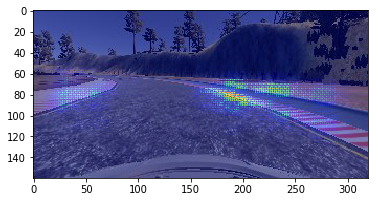

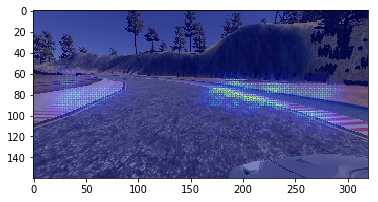

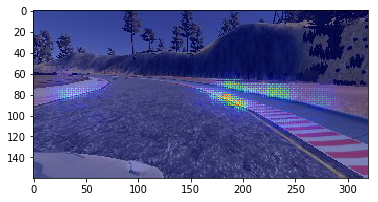

In [4]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam, visualize_saliency, overlay

modifier = 'guided'
for i, img in enumerate([image_1, image_2, image_3]):
    plt.figure()
    grads = visualize_saliency(model, layer_idx, filter_indices=1, seed_input=img, backprop_modifier=modifier)
    plt.imshow(img)
    plt.imshow(grads, cmap='jet', alpha=0.5)